# Poisson Gleichung

$\DeclareMathOperator{\opdiv}{div}$ $\DeclareMathOperator{\setR}{R}$

## Problemstellung, Differentialgleichung

``````{margin}
<br/><br/><br/><br/>
```{note}
- Poisson Gleichung
- Dirichlet Randbedingung
- Meshing
```
``````

Die Methode der finiten Elemente ist eine Methode für die numerische Berechnung von Lösungen partieller Differentialgleichungen. Eine sehr wichtige Gleichung ist die **Poisson Gleichung**. Sie kann als Verallgemeinerung des eindimensionalen Randwertproblem

$$\begin{split}
-u''(x) & = f(x)\quad\forall\ x\in (0,1)\\
u(0) & = u(1) = 0
\end{split}$$(eq:eindimrwp)

interpretiert werden. Die Poisson Gleichung ist gegeben durch

$$
-\Delta u(x) = f(x) \quad \forall \, x \in \Omega
$$

wobei $\Omega\subset \mathbb{R}^n$ ein mehrdimensionales Gebiet im $\mathbb{R}^n$ ist. 

Die Poisson Gleichung ist ein Modell für verschiedene physikalische Phenomene. So kann zum Beispiel:
* $f$ kann eine Verteilung einer **Wärmequelle** und $u$ die **Temperatur**
* $f$ kann auch eine Verteilung der **elektrischen Ladung** und $u$ entsprechend das **elektrostatische Potential**.

Um eine eindeutige Lösung $u$ zu erhalten, müssen Randbedingungen definiert werden. Im Beispiel werden wir die **homogene Dirichlet Randbedingung** benutzen:

$$
u(x) = 0 \quad \forall \, x \in \partial \Omega.
$$

Das zur Gleichung {eq}`eq:eindimrwp` analoge Randwertproblem ist in dem Fall für die Poisson Gleichung gegeben durch

$$\begin{split}
-\Delta u(x) & = f(x) \quad \forall \, x \in \Omega\\
u(x) & = 0 \quad \forall \, x \in \partial \Omega
\end{split}$$ (eq:poissonPDE)

Um eine numerische Lösung des Randwertproblems zum Beispiel im zweidimensionalen Raum berechnen zu können, müssen wir das Gebiet diskretisieren (**Meshing**). Wir betrachten das Problem auf dem Einheitsquadrat:

In [1]:
from netgen.geom2d import unit_square
from ngsolve import *
from ngsolve.webgui import Draw

In [2]:
ngmesh = unit_square.GenerateMesh()
for k in range(2):
    ngmesh.Refine()
mesh = Mesh(ngmesh)

Draw(mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2104-81-gc767972b4', 'mesh_dim': 2, 'order2d': 1, 'order3d': 1, 'd…

BaseWebGuiScene

## Schwache Gleichung

``````{margin}
<br/><br/><br/><br/>
```{note}
- starke Gleichung
- schwache Gleichung
- Testfunktion
- Funktionenraum
```
``````

Für die numerische Berechnung benötigen wir die **schwache Gleichung** (oder auch variationelle Formulierung) der Poisson Gleichung. Die oben formulierte partielle Differentialgleichung des Randwertproblems wird **starke Gleichung** genannt. Die schwache Gleichung ist die Ausgangsformulierung für die Diskretisierungsmethode der finiten Elemente.

Ein Weg auf die schwache Gleichung zu kommen ist folgender: Multipliziere die partielle Differentialgleichung mit einer sogenannten **Testfunktion**. Die Testfunktion ist eine beliebige Funktion aus einem geeigneten **Funktionenraum** $V$. Multiplikation der PDE mit $v\in V$ liefert

$$
- \Delta u(x) v(x) = f(x) v(x) \qquad \forall x \in \Omega
$$

Nun integrieren wir über das gesamte Gebiet $\Omega$:

$$
- \int_\Omega \Delta u(x) v(x) dx = \int_\Omega f(x) v(x) dx
$$

Mit Hilfe der partiellen Integration im Mehrdimensionalen (Satz von Gauss auf das Vektorfeld $\nabla u\, v$ angewandt):

$$
\int_{\partial \Omega} n \nabla u \, v\, dA = \int_\Omega \opdiv (\nabla u \, v) dx
= \int_{\Omega} \Delta u v + \nabla u \nabla v dx
$$

können wir die linke Seite in der Form

$$
\int_\Omega \nabla u \nabla v - \int_{\partial \Omega} \frac{\partial u}{\partial n} v = \int_\Omega f v
$$

schreiben.

Im Fall der Dirichlet Randbedingung können wir Testfunktionen $v$ benutzen, für welche $v(x) = 0$ auf dem Rand $\partial\Omega$ gilt.

Wir erhalten damit das **schwache Problem**: Finde $u\in V$ so, dass $u=0$ auf $\partial\Omega$ und

$$
\int_\Omega \nabla u\cdot \nabla v dx = \int_\Omega f v dx
$$ (eq:weakPoisson)

für alle Testfunktionen $v$ mit $v=0$ auf $\partial\Omega$ erfüllt ist.

Der Gewinn der schwachen Formulierung ist, dass wir das Problem mit der zweiten örtlichen Ableitung auf ein Problem mit erster Ableitung reduzieren können. Was natürlich die Frage aufwirft, wann eine **schwache Lösung** (Lösung der schwachen Gleichung) auch eine **starke Lösung** ist?

## Der Sobolev Raum $H^1$, linear und bilinear Formen

``````{margin}
<br/><br/><br/><br/>
```{note}
- Sobolev Raum $H^1$
- Funktionenraum $L_2$
- Norm, Skalarprodukt
- Hilbert Raum
- Linearform, Bilinearform
```
``````

Der für das Beispiel geeignete Funktionenraum für die Lösungen ist der **Sobolev Raum**

$$H^1 := \{u\in L_2(\Omega) | \nabla u\in L_2(\Omega)^n \}$$

Das hochgestellte 1 bezieht sich auf die erste Ableitung, welche quadratisch integrierbar sein soll ($L_2$). Wir werden den Ableitungsbegriff für die Anwendung erweitern müssen, denn nicht alle Funktionen im $L_2$ sind nicht stetig differenzierbar. Die zum Vektorraum $H^1$ zugehörige Norm ist gegeben durch

$$\| u\|_{H^1} = \| u\|_{L_2} + \| \nabla u\|_{L_2}$$

und für das Skalarprodukt gilt

$$(u,v)_{H^1} = (u,v)_{L_2} + (\nabla u,\nabla v)_{L_2}.$$

Der Funktionenraum $H^1$ ist ein vollständiger Raum mit Skalarprodukt. Einen solchen Raum nennt man Hilbert Raum.

Es macht keinen Sinn Randwerte von $L_2$ Funktionen zu definieren. Für Funktionen aus dem Sobolev Raum $H^1$ existiert jedoch das Trace Theorem, welches besagt, dass Randwerte wohl definiert sind. Es gilt für $u\in H^1(\Omega)$

$$u|_{\partial \Omega} \in L_2(\partial \Omega).$$

Damit macht es Sinn einen Unterraum $H_0^1$ mit homogenen Dirichlet Randbedingungen zu definieren

$$H_0^1 = \{u\in H^1 | u|_{\partial \Omega} = 0\}.$$

Wir betrachten nun die Gleichung {eq}`eq:weakPoisson`. Die linke Seite stellt eine **Bilinearform** $A: H^1\times H^1 \to \mathbb{R}$

$$A(u,v) = \int_\Omega \nabla u\cdot\nabla v$$

dar und die rechte Seite eine **Linearform** $f:H^1 \to \mathbb{R}$

$$f(v) := \int_\Omega f(x) v(x) dx.$$

Wir können damit das schwache Problem auch wie folgt beschreiben

$$\text{finde}\ u\in H_0^1(\Omega): \quad A(u,v) = f(v)\quad \forall v\in H_0^1(\Omega).$$ (eq:weakProblemPoisson2)

Dieser abstrakte Formalismus von Hilber Räumen, Bilinear- und Linearformen passt auf eine sehr grosse klasse von (elliptischen) partiellen Differentialgleichungen.

## Finite Elemente Methode

``````{margin}
<br/><br/><br/><br/>
```{note}
- Finite Elemente Methode
- Diskretisierungsfehler
```
``````

Die schwache Formulierung ist die Ausgangsform für die Methode der finiten Elemente. Da wir nicht in einem unendlich dimensionalen **Hilbertraum** rechnen können, müssen wir einen endlich dimensionalen **Unterraum** benutzen. 

$$V_h \subset H_0^1$$

In [3]:
V = H1(mesh, order=1, dirichlet = '.*')
u,v = V.TnT()

Wir suchen nun Lösungen für schwache Problem {eq}`eq:weakProblemPoisson2` im endlich dimensionalen Vektorraum $V_h$:

$$\text{finde}\ u_h\in V_h: \quad A(u_h,v_h) = f(v_h)\quad \forall v_h\in V_h.$$ (eq:weakProblemPoisson3)

Die finite Elemente Lösung approximiert die exakte Lösung $u$, wobei der Diskretisierungsfehler $\|u-u_h\|_{H^1}$ für $h\to 0$ ebenfalls gegen Null streben soll.

Um die Lösung $u_h$ berechnen zu können, müssen wir eine Basis $p_i, i=1,\ldots, N$ für den Funktionenraum $V_h$ wählen, wobei $N = \mathop{dim} V_h$.

In [4]:
print('dim V = N = ',V.ndof)

dim V = N =  25


$u_h$ können wir daher als

$$u_h(x) = \sum_{i=1}^N u_i p_i(x)$$

schreiben. Die Koeffizienten $u_i$ schreiben wir als Koeffizientenvektor $u=(u_1, \ldots, u_n) \in \mathbb{R}^N$.

In [5]:
gfu = GridFunction(V)

Anstatt, dass wir mit allen Funktionen aus dem $V_h$ test, reicht es mit den Basisfunktionen $p_j(x)$ zu testen. Damit haben wir das finite Element Problem

$$\text{finde}\ u\in \mathbb{R}^N: \quad A(\sum_{i=1}^N u_i p_i,p_j) = f(p_j)\quad \forall j = 1, \ldots, N.$$ 

Da $A(\cdot, \cdot)$ eine Bilinearfunktion ist, können wir die Summe aus der Bilinearfunktion nehmen. Es folgt

$$\text{finde}\ u\in \mathbb{R}^N: \quad \sum_{i=1}^N A(p_i,p_j) u_i = f(p_j)\quad \forall j = 1, \ldots, N.$$ (eq:FEMProblemPoisson)

Da die Basisfunktionen $p_i$ bekannt sind, können wir die Matrix $A\in\mathbb{R}^{N\times N}$ welche die Bilinearfunktion beschreibt berechnen. Die Matrix Einträge sind gegeben durch

$$A_{j,i} = A(p_i,p_j) = \int_\Omega \nabla p_i\cdot \nabla p_j dx.$$

In [6]:
a = BilinearForm(V)
a += grad(u)*grad(v)*dx
a.Assemble();

Die Linearform $f$ kann durch den Vektor $f\in\mathbb{R}^N$ 

$$f_j = f(p_j) = \int_\Omega f(x)p_j(x)dx$$

beschrieben werden.

In [7]:
funcf = CoefficientFunction(10)

f = LinearForm(V)
f += funcf*v*dx
f.Assemble();

Das Lösen des finite Elementproblems {eq}`eq:FEMProblemPoisson` resultiert somit im Lösen des linearen Gleichungssystems

$$A u = f$$

In [8]:
gfu.vec.data = a.mat.Inverse(freedofs=V.FreeDofs()) * f.vec
Draw(gfu)

WebGuiWidget(value={'ngsolve_version': '6.2.2104-81-gc767972b4', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [9]:
import matplotlib.pyplot as plt
import scipy.sparse as sp

In [10]:
rows,cols,vals = a.mat.COO()

In [11]:
A = sp.csr_matrix((vals,(rows,cols)))

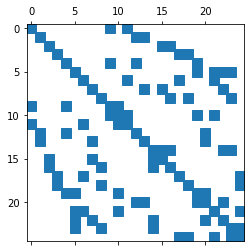

In [12]:
plt.spy(A)
plt.show()